In [2]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("sample.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


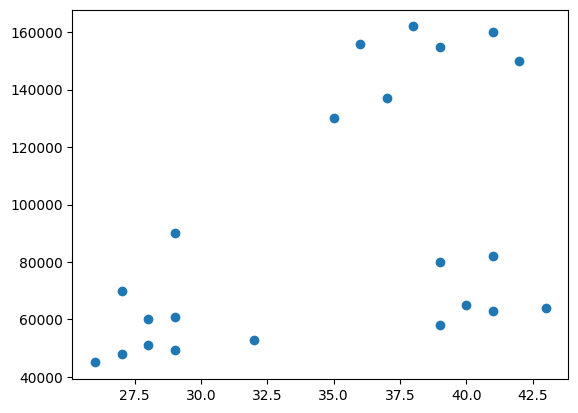

In [4]:
plt.scatter(df["Age"] , df["Income($)"])

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age' , 'Income($)']])
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3556\3601727033.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


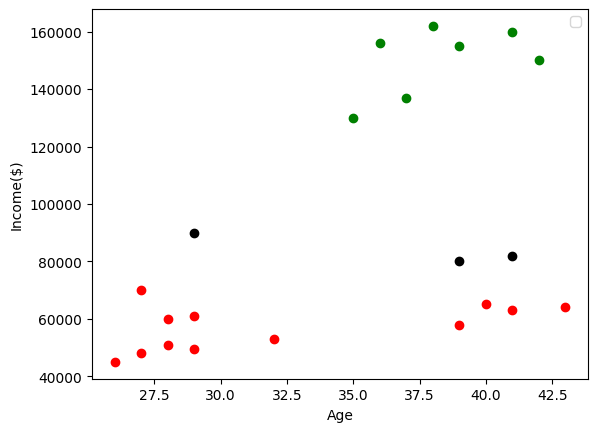

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


plt.scatter(df1.Age , df1["Income($)"] , color="green")
plt.scatter(df2.Age , df2['Income($)'] , color="red")
plt.scatter(df3.Age , df3['Income($)'] , color="black")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [8]:
min_max = MinMaxScaler()
df['Income($)'] = min_max.fit_transform(df[['Income($)']])
df.head()

df["Age"] = min_max.fit_transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age' , 'Income($)']])
df["cluster"] = y_predicted

In [10]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

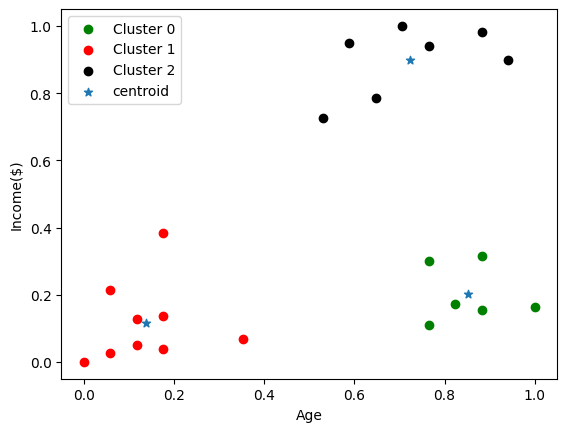

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


plt.scatter(df1.Age , df1["Income($)"] , color="green" ,  label="Cluster 0")
plt.scatter(df2.Age , df2['Income($)'] , color="red" ,  label="Cluster 1")
plt.scatter(df3.Age , df3['Income($)'] , color="black" ,  label="Cluster 2")

plt.scatter(km.cluster_centers_[: , 0] , km.cluster_centers_[: , 1] , marker = "*" , label="centroid")

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [12]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age' , 'Income($)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

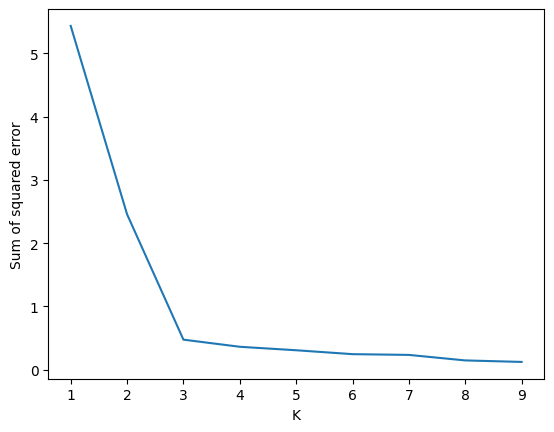

In [13]:
plt.plot( k_rng, sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')